# Titanic Survival Prediction

#### About the Problem :-

This is a Binary classification problem where we have to predict only Yes(1, true) or No(0, false). 
So these are the following steps which we will follow - 
1. Data Analysis - 
 a. Check the type and  number of Features (Inputs) and trying to remove any unwanted features which             may not help in prediction.
 b. Join train and test dataset and try to fill Null values 
                   
2. Visualisation - 
a. Plot Graphs.
b. Try to find Co-relation between different features and Survival.
                   
3. Feature Engineering - 
a. Adding additional features which may help in Survival prediction.

4. Modelling - 
a.Try to predict output using various Models.

#### Lets Import some Libraries !!

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import numpy.random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading Train and Test Data

In [2]:
train = pd.read_csv("../train.csv",sep=',')
test = pd.read_csv("../test.csv", sep=',')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
len_train = len(train)

#### Concatenate both Train and Test datasets for data cleaning

In [5]:
dataset = pd.concat([train, test], ignore_index=True)
print(dataset.shape)
dataset.head()

(1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [6]:
dataset.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### Visualisation
Lets plot some graph to get better Insights.

#### Sex vs Survival

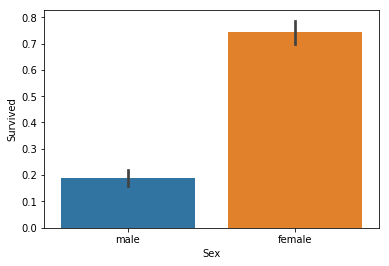

In [7]:
sns.barplot(x='Sex', y='Survived', data=train)

As we see, females have got a better chance of Survival 

#### PClass vs Survival

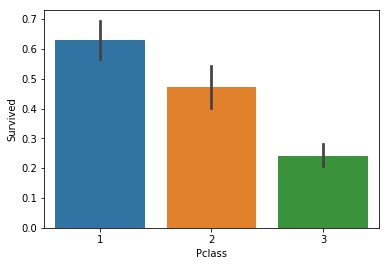

In [8]:
sns.barplot(x= 'Pclass', y='Survived', data=train)

#### Embarked vs Survival

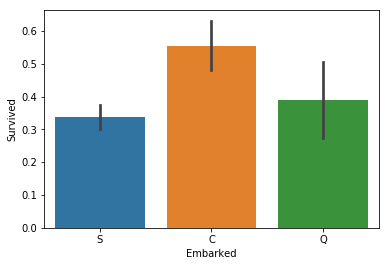

In [9]:
sns.barplot(x='Embarked', y='Survived', data=train)

Those who embarked at port C had better Survival chances

#### Age vs Survival

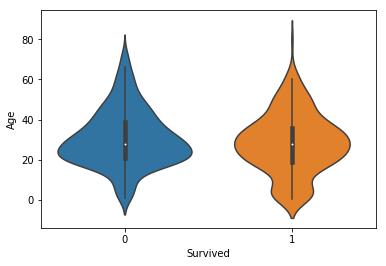

In [10]:
sns.violinplot(x='Survived', y= 'Age', data=train)

As we see from the Violin plot, younger children and old people had more Survival rate. 

#### Filling Null values

In [11]:
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Age has 267 Null values.
Survived - Since we have concatenated test and train data, the 418 null values are from test set which need not be filled.
Embarked - Since there are only 2 null values, we will fill it with the most Embarked one.
Since cabin has too many empty values, lets drop that column.
Since Ticket has not much Corelation with Survival, we will drop that too.


Filling Age null Values with random numbers generated between its mean and standard deviation.

In [12]:
age_mean = dataset['Age'].mean()
age_std = dataset['Age'].std()
nan_count = dataset['Age'].isnull().sum()
dataset['Age'][np.isnan(dataset['Age'])] = rnd.randint(age_mean - age_std, age_mean + age_std, size= nan_count)

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [13]:
dataset = dataset.drop(['Cabin', 'Ticket'], axis =1)

In [14]:
dataset['Fare'][np.isnan(dataset['Fare'])] = dataset['Fare'].mean()

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
top = dataset['Embarked'].describe().top
dataset['Embarked'] = dataset['Embarked'].fillna(top)

#### converting Categorical data to Numerical 

In [16]:
dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1})

In [17]:
dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

In [18]:
print(dataset.isnull().sum())
dataset.head()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dtype: int64


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0
1,38.0,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0
2,26.0,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0
3,35.0,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0
4,35.0,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0


### Feature Engineering

##### Extracting titles from name

In [19]:
title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset['Title'] = pd.Series(title)
dataset['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [20]:
dataset['Title'].describe()

count     1309
unique      18
top         Mr
freq       757
Name: Title, dtype: object

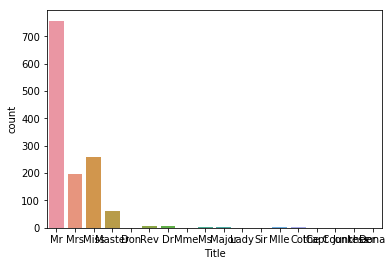

In [21]:
sns.countplot(x="Title",data=dataset)

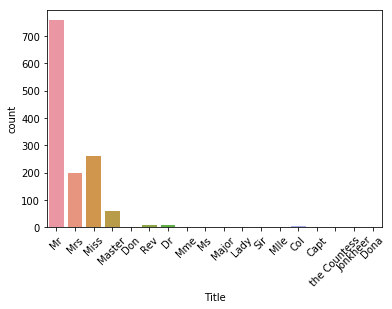

In [22]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [23]:
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don',
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1,
                                         "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

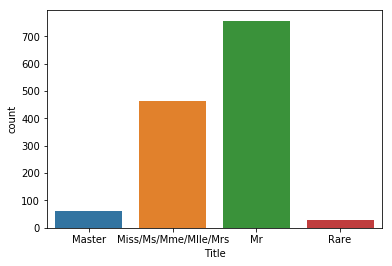

In [24]:
g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

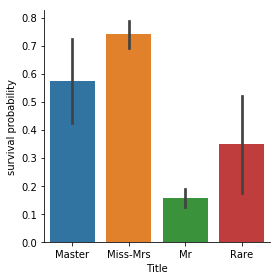

In [25]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [26]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [27]:
dataset.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,0,7.2500,0,1,3,0,1,0.0,2
1,38.0,1,71.2833,0,2,1,1,1,1.0,1
2,26.0,0,7.9250,0,3,3,1,0,1.0,1
3,35.0,0,53.1000,0,4,1,1,1,1.0,1
4,35.0,0,8.0500,0,5,3,0,0,0.0,2


### Modelling

Seperating the train and test data from the concatenated dataframe.

In [28]:
train = dataset[:len_train]
test = dataset[len_train:]
test.drop(['Survived'], axis=1, inplace=True)

C:\Users\rrjain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
Y_train = train['Survived'].astype(int)
X_train = train.drop(['Survived'], axis=1)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [31]:
X_train.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Title
0,22.0,0,7.2500,0,1,3,0,1,2
1,38.0,1,71.2833,0,2,1,1,1,1
2,26.0,0,7.9250,0,3,3,1,0,1
3,35.0,0,53.1000,0,4,1,1,1,1
4,35.0,0,8.0500,0,5,3,0,0,2


In [32]:
clf_log = LogisticRegression()
clf_log.fit(X_train, Y_train)
acc_log = clf_log.score(X_train, Y_train)
acc_log

0.8237934904601572

In [38]:
clf_rnd = RandomForestClassifier()
clf_rnd.fit(X_train, Y_train)
acc_rnd = clf_rnd.score(X_train, Y_train)
acc_rnd

0.9809203142536476

In [36]:
clf_svc = LinearSVC()
clf_svc.fit(X_train, Y_train)
acc_svc = clf_svc.score(X_train, Y_train)
acc_svc

0.7250280583613917

In [34]:
clf_knc = KNeighborsClassifier()
clf_knc.fit(X_train, Y_train)
acc_knc = clf_knc.score(X_train, Y_train)
acc_knc

0.7530864197530864

In [35]:
clf_gc = GaussianNB();
clf_gc.fit(X_train, Y_train)
acc_gc = clf_gc.score(X_train, Y_train)
acc_gc

0.819304152637486

After checking accuracies of various Algorithms, we see that RandomForestClassifier has highest accuracy (Infact i think it has overfit the data, we should decrease the variance by  adding more features and  normalize the data) . Will do that soon.

#### Lets predict the test data output using random forest classifier

In [39]:
y_rnd = clf_rnd.predict(test)


Add the result y_rnd to submission dataframe and submit the created file on Kaggle.

In [40]:

submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": y_rnd
})


In [42]:
submission.to_csv('submission.csv', sep=',', encoding='utf-8', index=False)

Hope this Notebook has helped you in getting started with kaggle. Please upvote if you have liked it.